<a href="https://colab.research.google.com/github/Sreelekshmi688582/project/blob/main/Emotion%20analysis%20from%20song%20lyrics%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
from PIL import Image

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas_bokeh
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
pd.set_option('plotting.backend', 'pandas_bokeh')
pd.set_option('display.max_colwidth', 30)

In [1]:
pip install pandas-bokeh

In [4]:
pandas_bokeh.output_notebook()

In [5]:
lyrics_df = pd.read_csv('taylor_swift_lyrics.csv',
                        encoding='Latin1')

In [6]:
lyrics_df.head()

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue ey...,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to...,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of get...,5,2006


In [7]:
lyrics_df.shape

(4862, 7)

In [8]:
lyrics_df.dtypes

artist         object
album          object
track_title    object
track_n         int64
lyric          object
line            int64
year            int64
dtype: object

In [9]:
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       4862 non-null   object
 1   album        4862 non-null   object
 2   track_title  4862 non-null   object
 3   track_n      4862 non-null   int64 
 4   lyric        4862 non-null   object
 5   line         4862 non-null   int64 
 6   year         4862 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 266.0+ KB


In [10]:
# typecasting
for col in ['artist', 'album', 'track_title']:
    lyrics_df[col] = lyrics_df[col].astype('category')

In [11]:
# create album catalog
full_catalog = {}

for album in lyrics_df['album'].unique():
    full_catalog[album] = []
    for track_title in lyrics_df[lyrics_df['album'] == album]['track_title'].unique():
        full_catalog[album].append(track_title)

In [12]:
full_catalog

{'1989': ['Welcome to New York',
  'Blank Space',
  'Style',
  'Out of the Woods',
  'All You Had to Do Was Stay',
  'Shake It Off',
  'I Wish You Would',
  'Bad Blood',
  'Wildest Dreams',
  'How You Get The Girl',
  'This Love',
  'I Know Places',
  'Clean',
  'Wonderland',
  'You Are in Love',
  'New Romantics'],
 'Fearless': ['Fearless',
  'Fifteen',
  'Love Story',
  'Hey Stephen',
  'White Horse',
  'You Belong With Me',
  'Breathe (Ft.Â\xa0ColbieÂ\xa0Caillat)',
  'Tell Me Why',
  "You're Not Sorry",
  'The Way I Loved You',
  'Forever & Always',
  'The Best Day',
  'Change'],
 'Red': ['State of Grace',
  'Red',
  'Treacherous',
  'I Knew You Were Trouble',
  'All Too Well',
  '22',
  'I Almost Do',
  'We Are Never Ever Getting Back Together',
  'Stay Stay Stay',
  'The Last Time (Ft.Â\xa0GaryÂ\xa0Lightbody)',
  'Holy Ground',
  'Sad Beautiful Tragic',
  'The Lucky One',
  'Everything Has Changed (Ft.Â\xa0EdÂ\xa0Sheeran)',
  'Starlight',
  'Begin Again',
  'The Moment I Knew',
  

In [13]:
# see tracks for select album
full_catalog['1989']

['Welcome to New York',
 'Blank Space',
 'Style',
 'Out of the Woods',
 'All You Had to Do Was Stay',
 'Shake It Off',
 'I Wish You Would',
 'Bad Blood',
 'Wildest Dreams',
 'How You Get The Girl',
 'This Love',
 'I Know Places',
 'Clean',
 'Wonderland',
 'You Are in Love',
 'New Romantics']

In [14]:
# define function to get song lyrics
def get_song_lyrics(track_title, df=lyrics_df):
    full_song = ' '.join(line for line in df[df['track_title'] == track_title]['lyric'])
    return full_song

In [15]:
get_song_lyrics('I Know Places')

"You stand with your hand on my waistline It's a scene and we're out here in plain sight I can hear them whisper as we pass by It's a bad sign (bad sign) Something happens when everybody finds out See the vultures circling dark clouds Love's a fragile little flame It could burn out, it could burn out 'Cause they got the cages, they got the boxes And guns They are the hunters, we are the foxes And we run Baby, I know places we won't be found And they'll be chasing their tails trying to track us down 'Cause I, I know places we can hide I know places, I know places Lights flash and we'll run for the fences Let them say what they want, we won't hear it Loose lips sink ships all the damn time Not this time Just grab my hand and don't ever drop it My love They are the hunters, we are the foxes And we run Baby, I know places we won't be found And they'll be chasing their tails trying to track us down 'Cause I, I know places we can hide I know places, I know places They are the hunters, we are

In [16]:
# define function to create wordcloud for selected song
def create_song_wordcloud(track_title):
    
    song_lyrics = get_song_lyrics(track_title)
    
    # create mask array of heart shape
    mask_path = Path('heart_shape.png')
    heart_mask = np.array(Image.open(mask_path))
    heart_color = ImageColorGenerator(heart_mask.copy())
    
    # draw wordcloud
    wc = WordCloud(max_words=1000,
               background_color='black',
               mask=heart_mask,
               max_font_size=100,
               relative_scaling=0)
    wc.generate(song_lyrics)
    wc.recolor(color_func=heart_color)
    plt.figure(figsize=(20, 10))
    plt.axis('off')
    plt.imshow(wc, interpolation="bilinear")

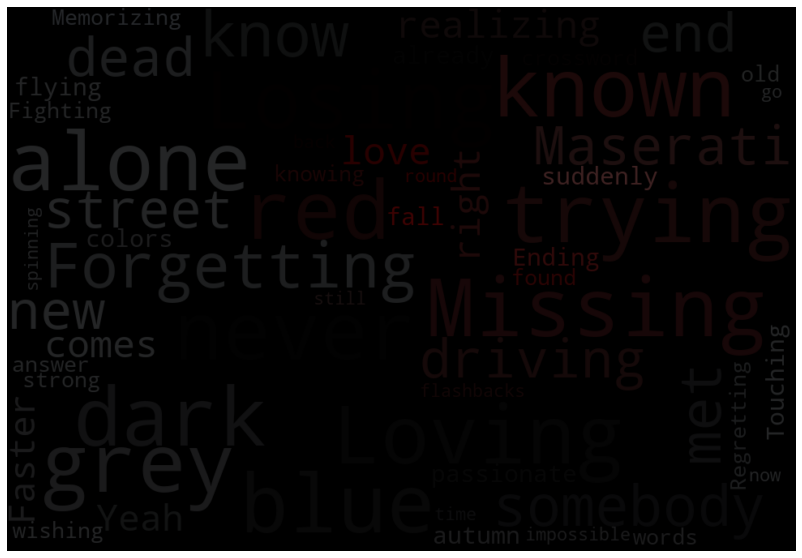

In [17]:
create_song_wordcloud('Red')

In [18]:
# define function to get pos tags for selected song
def get_pos_tags(track_title):
    
    song_lyrics = get_song_lyrics(track_title)
    tokens = nltk.word_tokenize(song_lyrics)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

In [19]:
full_catalog['1989']

['Welcome to New York',
 'Blank Space',
 'Style',
 'Out of the Woods',
 'All You Had to Do Was Stay',
 'Shake It Off',
 'I Wish You Would',
 'Bad Blood',
 'Wildest Dreams',
 'How You Get The Girl',
 'This Love',
 'I Know Places',
 'Clean',
 'Wonderland',
 'You Are in Love',
 'New Romantics']

In [63]:
get_pos_tags('Shake It Off')[5:900]

[('Got', 'NNP'),
 ('nothing', 'NN'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('brain', 'NN'),
 ('That', 'DT'),
 ("'s", 'VBZ'),
 ('what', 'WP'),
 ('people', 'NNS'),
 ('say', 'VBP'),
 (',', ','),
 ('mmm', 'FW'),
 (',', ','),
 ('mmm', 'VBP'),
 ('That', 'DT'),
 ("'s", 'VBZ'),
 ('what', 'WP'),
 ('people', 'NNS'),
 ('say', 'VBP'),
 (',', ','),
 ('mmm', 'FW'),
 (',', ','),
 ('mmm', 'NN'),
 ('I', 'PRP'),
 ('go', 'VBP'),
 ('on', 'IN'),
 ('too', 'RB'),
 ('many', 'JJ'),
 ('dates', 'NNS'),
 ('But', 'CC'),
 ('I', 'PRP'),
 ('ca', 'MD'),
 ("n't", 'RB'),
 ('make', 'VB'),
 ('them', 'PRP'),
 ('stay', 'VB'),
 ('At', 'IN'),
 ('least', 'JJS'),
 ('that', 'DT'),
 ("'s", 'VBZ'),
 ('what', 'WP'),
 ('people', 'NNS'),
 ('say', 'VBP'),
 (',', ','),
 ('mmm', 'FW'),
 (',', ','),
 ('mmm', 'VBP'),
 ('That', 'DT'),
 ("'s", 'VBZ'),
 ('what', 'WP'),
 ('people', 'NNS'),
 ('say', 'VBP'),
 (',', ','),
 ('mmm', 'FW'),
 (',', ','),
 ('mmm', 'FW'),
 ('But', 'CC'),
 ('I', 'PRP'),
 ('keep', 'VBP'),
 ('cruisin', 'NN'),
 ("'", "''"),
 (

In [21]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [23]:
# find lemmas and stems of tokens
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

def find_stem_lyrics(track_title):
    
    song_lyrics = get_song_lyrics(track_title)
    tokens = nltk.word_tokenize(song_lyrics)
    
    # initialize stemmer
    stemmer = PorterStemmer() 
    stemmed_tokens = list(set([stemmer.stem(token) for token in tokens]))
    return stemmed_tokens


def find_lemmas_lyrics(track_title):
    
    song_lyrics = get_song_lyrics(track_title)
    tokens = nltk.word_tokenize(song_lyrics)
    
    # initialize Lemmatizer
    lem = WordNetLemmatizer()
    lemmas_tokens = list(set([lem.lemmatize(token) for token in tokens]))
    return lemmas_tokens

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
find_stem_lyrics('Style')

['fade',
 'sinc',
 'go',
 'even',
 'So',
 'about',
 'off',
 'and',
 "'bout",
 'It',
 'light',
 'some',
 'too',
 'the',
 'know',
 'goe',
 'what',
 'littl',
 'ca',
 'crash',
 'of',
 'thing',
 'road',
 'dean',
 'long',
 't-shirt',
 'everytim',
 'headlight',
 'other',
 'just',
 'He',
 '``',
 'he',
 'tell',
 'view',
 'paradis',
 'red',
 'out',
 'lead',
 'exactli',
 'end',
 'been',
 'with',
 'no',
 'each',
 'eye',
 'come',
 'mmm',
 'leav',
 'into',
 'skirt',
 'time',
 'is',
 'true',
 'pick',
 'where',
 'we',
 'in',
 'it',
 'tight',
 'coat',
 ',',
 'that',
 'good',
 'lip',
 'hi',
 'up',
 'could',
 'or',
 'classic',
 'yeah',
 'there',
 'slick',
 'Oh',
 "n't",
 'stop',
 "'s",
 '(',
 'daydream',
 'white',
 'have',
 'heard',
 'everi',
 'back',
 'are',
 'caus',
 "'ve",
 'said',
 'me',
 'on',
 'like',
 'midnight',
 'a',
 'to',
 'jame',
 'flame',
 'never',
 'round',
 'from',
 'burn',
 'take',
 'while',
 'your',
 'say',
 'faith',
 'wild',
 'home',
 'think',
 'you',
 'down',
 'drive',
 'Ca',
 'when',


In [30]:
find_lemmas_lyrics('Out of the Woods')

['The',
 'wa',
 'couch',
 'decided',
 'did',
 'fall',
 'and',
 'necklace',
 'move',
 'Two',
 'yet',
 'It',
 'too',
 'the',
 'Polaroid',
 'came',
 'my',
 'furniture',
 'be',
 'world',
 'ooh',
 'Good',
 'apart',
 'of',
 'so',
 'discovered',
 'setting',
 'stood',
 'at',
 'Your',
 'Looking',
 'We',
 'Then',
 'just',
 'screaming',
 'night',
 'took',
 'turned',
 'clear',
 'out',
 'Remember',
 "'m",
 'Last',
 'You',
 'chance',
 'thinkingâ\x80¦',
 'all',
 'together',
 'u',
 'December',
 'baby',
 'In',
 'When',
 'simple',
 'wood',
 'seems',
 'we',
 'hospital',
 'in',
 'brake',
 'it',
 'heat',
 'Twenty',
 ',',
 'color',
 'up',
 'started',
 'But',
 'could',
 'flying',
 'remember',
 'Oh',
 "n't",
 'black',
 '(',
 'monster',
 'white',
 'cry',
 'soon',
 'back',
 'now',
 'stitch',
 'said',
 'walked',
 'Are',
 'hanging',
 'on',
 'me',
 'like',
 'rest',
 'To',
 'built',
 'free',
 'room',
 '!',
 'tree',
 'a',
 'to',
 'last',
 'Baby',
 'And',
 'sun',
 '?',
 'from',
 'quite',
 'hit',
 'neck',
 'dance',
 '

In [29]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [31]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

def plot_freqdist(track_title, n):
    
    # get tokens from song lyrics
    song_lyrics = get_song_lyrics(track_title)
    
    # initialize tokenizer
    tokenizer = RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(song_lyrics)
    
    # remove stopwords
    stopwords_list_en = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwords_list_en]
    
    # get frequency distribution of tokens
    fd = nltk.FreqDist(tokens)
    return fd.plot(n)

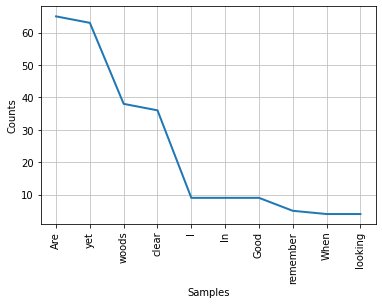

In [35]:
plot_freqdist('Out of the Woods', 10);

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment(text):
    
    # initialize tokenizer
    tokenizer = RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(text)
    
    sd = SentimentIntensityAnalyzer()
    return sd.polarity_scores(text)

In [40]:
lyrics_df['sentiment_score'] = lyrics_df['lyric'].apply(get_sentiment)

In [38]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [39]:
def decompose_sentiment_scores(df):
    for sentiment in ['neg', 'neu', 'pos',
                'compound']:
        df[sentiment] = df['sentiment_score'].apply(
                                lambda x: x[sentiment]*100)
    df.rename(columns={'neg': 'negative (%)',
                       'pos': 'positive (%)',
                       'neu': 'neutral (%)',
                       'compound': 'mixed (%)'}, inplace=True)

In [41]:
decompose_sentiment_scores(lyrics_df)

In [65]:
lyrics_df.head()

,artist,album,track_title,track_n,lyric,line,year,sentiment_score,negative (%),neutral (%),positive (%),mixed (%),negative,neutral,positive,compound
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue ey...,1,2006,"{'neg': 0.0, 'neu': 1.0, '...",0.0,100.0,0.0,0.00,0.000,1.000,0.0,0.0000
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to...,2,2006,"{'neg': 0.307, 'neu': 0.69...",30.7,69.3,0.0,-47.67,0.307,0.693,0.0,-0.4767
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,"{'neg': 0.0, 'neu': 1.0, '...",0.0,100.0,0.0,0.00,0.000,1.000,0.0,0.0000
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,"{'neg': 0.0, 'neu': 1.0, '...",0.0,100.0,0.0,0.00,0.000,1.000,0.0,0.0000
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of get...,5,2006,"{'neg': 0.286, 'neu': 0.71...",28.6,71.4,0.0,-25.00,0.286,0.714,0.0,-0.2500


In [43]:
lyrics_df.groupby('track_title')[['negative (%)', 'neutral (%)', 'positive (%)',
                            'mixed (%)']].mean()

,negative (%),neutral (%),positive (%),mixed (%)
track_title,,,,
...Ready for It?,7.090164,83.327869,9.578689,2.189672
22,5.054717,74.141509,20.803774,18.656226
A Perfectly Good Heart,1.030435,75.026087,23.943478,37.589565
A Place In This World,5.170370,85.611111,9.218519,3.266296
All Too Well,5.476596,84.195745,10.327660,7.430638
...,...,...,...,...
Wildest Dreams,3.522414,83.812069,12.663793,9.931724
Wonderland,7.449254,88.480597,4.071642,-5.306418
You Are in Love,3.302222,78.668889,18.028889,16.676000


In [44]:
grouped = lyrics_df.groupby('track_title')[['negative (%)', 'neutral (%)', 'positive (%)',
                            'mixed (%)']].mean().reset_index()

In [45]:
grouped

,track_title,negative (%),neutral (%),positive (%),mixed (%)
0,...Ready for It?,7.090164,83.327869,9.578689,2.189672
1,22,5.054717,74.141509,20.803774,18.656226
2,A Perfectly Good Heart,1.030435,75.026087,23.943478,37.589565
3,A Place In This World,5.170370,85.611111,9.218519,3.266296
4,All Too Well,5.476596,84.195745,10.327660,7.430638
...,...,...,...,...,...
89,Wildest Dreams,3.522414,83.812069,12.663793,9.931724
90,Wonderland,7.449254,88.480597,4.071642,-5.306418
91,You Are in Love,3.302222,78.668889,18.028889,16.676000
92,You Belong With Me,3.330612,89.520408,7.148980,5.932653


In [46]:
def plot_sentiment_by_track(track_title):
    
    grouped = lyrics_df.groupby('track_title')[['negative (%)', 'neutral (%)', 'positive (%)',
                            'mixed (%)']].mean().reset_index()
    
    grouped[grouped['track_title'] == track_title].plot_bokeh.bar(
            xlabel='Sentiment Score', xticks=[0, 1, 2, 3],
                        
            title='Sentiment score for track: '+ str(track_title))

In [47]:
plot_sentiment_by_track('Shake It Off')

In [48]:
neg_sentiments = grouped[grouped['track_title'].isin(full_catalog['1989'])]['negative (%)']

In [49]:
neg_sentiments

5      1.872857
7     18.220000
10    13.939759
14     7.611429
34     5.652830
38     5.113636
39     3.675904
53     9.138596
57     1.554286
61    27.829167
70     0.875000
82     6.943243
87     0.704615
89     3.522414
90     7.449254
91     3.302222
Name: negative (%), dtype: float64

In [50]:
pos_sentiments = grouped[grouped['track_title'].isin(full_catalog['1989'])]['positive (%)']

In [64]:
pos_sentiments

5     10.715714
7      8.030000
10    11.821687
14    11.571429
34     6.535849
38     6.568182
39    32.431325
53    22.342105
57    12.715714
61     7.944444
70     6.140909
82    26.070270
87    28.212308
89    12.663793
90     4.071642
91    18.028889
Name: positive (%), dtype: float64

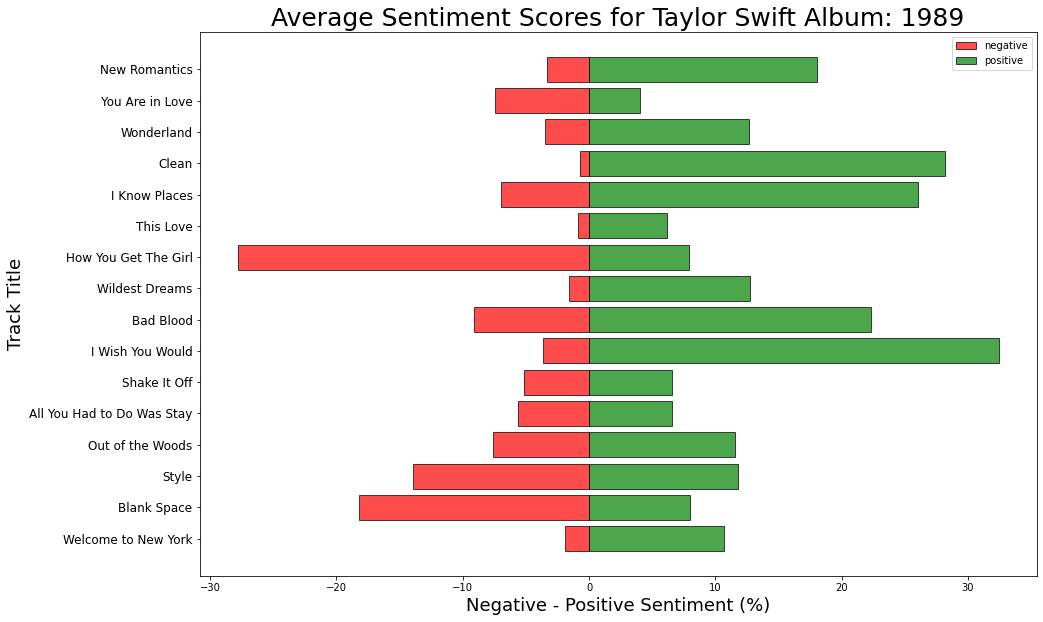

In [52]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(np.arange(len(neg_sentiments)),
        -neg_sentiments,
        facecolor='red', alpha=0.7,
        edgecolor='black',
        label='negative')
ax.barh(np.arange(len(pos_sentiments)),
        pos_sentiments,
        facecolor='green', alpha=0.7,
        edgecolor='black',
        label='positive')

ax.set_yticks(np.arange(len(pos_sentiments)))
ax.set_yticklabels(full_catalog['1989'], 
                   fontsize=12)
ax.set_ylabel('Track Title', fontsize=18)
ax.set_xlabel('Negative - Positive Sentiment (%)',
              fontsize=18)

ax.set_title('Average Sentiment Scores for Taylor Swift Album: 1989',
             fontsize=25)
ax.legend(loc='best')
plt.show()

In [53]:
#Create lists to store the different scores for each word
negative = []
neutral = []
positive = []
compound = []
#Initialize the model
sid = SentimentIntensityAnalyzer()
#Iterate for each row of lyrics and append the scores
for i in lyrics_df.index:
    scores = sid.polarity_scores(lyrics_df['lyric'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])
#Create 4 columns to the main data frame  for each score
lyrics_df['negative'] = negative
lyrics_df['neutral'] = neutral
lyrics_df['positive'] = positive
lyrics_df['compound'] = compound
lyrics_df.head()

,artist,album,track_title,track_n,lyric,line,year,sentiment_score,negative (%),neutral (%),positive (%),mixed (%),negative,neutral,positive,compound
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue ey...,1,2006,"{'neg': 0.0, 'neu': 1.0, '...",0.0,100.0,0.0,0.00,0.000,1.000,0.0,0.0000
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to...,2,2006,"{'neg': 0.307, 'neu': 0.69...",30.7,69.3,0.0,-47.67,0.307,0.693,0.0,-0.4767
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,"{'neg': 0.0, 'neu': 1.0, '...",0.0,100.0,0.0,0.00,0.000,1.000,0.0,0.0000
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,"{'neg': 0.0, 'neu': 1.0, '...",0.0,100.0,0.0,0.00,0.000,1.000,0.0,0.0000
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of get...,5,2006,"{'neg': 0.286, 'neu': 0.71...",28.6,71.4,0.0,-25.00,0.286,0.714,0.0,-0.2500


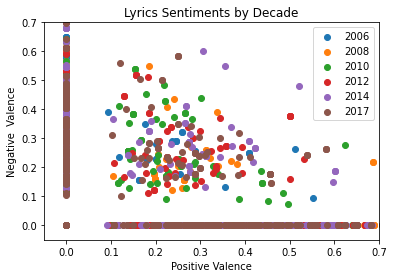

In [54]:
for name, group in lyrics_df.groupby('year'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)
plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Lyrics Sentiments by Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

In [55]:
means_df = lyrics_df.groupby(['year']).mean()
means_df

,track_n,line,negative (%),neutral (%),positive (%),mixed (%),negative,neutral,positive,compound
year,,,,,,,,,,
2006,7.359788,22.128748,6.871429,81.421693,11.706702,5.461217,0.068714,0.814217,0.117067,0.054612
2008,6.730838,22.442068,6.946702,80.190196,12.863280,8.308396,0.069467,0.801902,0.128633,0.083084
2010,8.926882,28.620430,6.216237,83.474839,10.309032,4.519925,0.062162,0.834748,0.103090,0.045199
2012,10.003550,24.074556,6.636923,80.410888,12.952899,8.939941,0.066369,0.804109,0.129529,0.089399
2014,7.904512,32.131165,7.855404,77.823610,14.321511,7.238919,0.078554,0.778236,0.143215,0.072389
2017,7.667992,35.280318,6.353380,82.338171,11.308151,5.350308,0.063534,0.823382,0.113082,0.053503


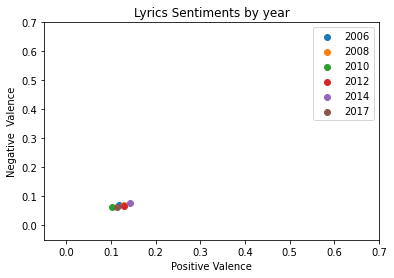

In [67]:
for name, group in means_df.groupby('year'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()
plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Lyrics Sentiments by year")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

In [68]:
for name, group in means_df.groupby('year'):
    print(sum(group['positive']),'positive')
    print(sum(group['negative']),'negative')

0.11706701940035275 positive
0.06871428571428574 negative
0.12863279857397503 positive
0.0694670231729055 negative
0.10309032258064506 positive
0.062162365591397886 negative
0.12952899408284027 positive
0.06636923076923076 negative
0.14321511017838415 positive
0.07855403987408179 negative
0.11308151093439384 positive
0.06353379721669973 negative


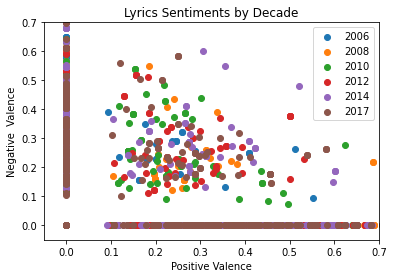

In [66]:
for name, group in lyrics_df.groupby('year'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)
plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Lyrics Sentiments by Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

In [73]:
def train_naiveBayes(corpus_train, label):
    
    # Model Naive bayes
    labeled_train_data = songs_to_documents(corpus_train,label)
    classifier = nltk.NaiveBayesClassifier.train(labeled_train_data)


    print('Accuracy for train data', nltk.classify.accuracy(classifier,labeled_train_data))
    return classifier

In [74]:
# Test Naive Bayes function
def test_naiveBayes(model,corpus_test,label):
    labeled_test_data = songs_to_documents(corpus_test,label)
    print('Accuracy for test data', nltk.classify.accuracy(model,labeled_test_data))

In [75]:
# Generate n_grams
def generate_ngrams(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [76]:
# Text cleaning: tokenize, lower case, reg check to remove unwanted quotes, stop words removal
def data_clean(songs):
    docs = songs.tolist()
     
    stop_list = nltk.corpus.stopwords.words('english')
    docs2 = [[w.lower() for w in doc] for doc in docs]
    docs3 = [[w for w in doc if re.search('^[a-zA-Z0-9]+$', w)] for doc in docs2]
    docs4 = [[w for w in doc if w not in stop_list] for doc in docs3]

    stemmer = PorterStemmer()
    corpus_clean = [[stemmer.stem(w) for w in doc] for doc in docs4]
    return corpus_clean
    